# Python Data Science

## Step 1: Import Libraries

In [1]:
#import library: pd for dataframe, sns for plot graphs, scikit learn for prediction, pipeline for easier data processing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aiohttp
import asyncio
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

## Step 2: Import Dataset (Data obtained from Github, so credit to the owner of the data.)

In [2]:
#Download function
async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                content = await response.text()

                with open(filename, "w") as f:
                    f.write(content)
            else:
                print(f"Failed to download {url}. Status code: {response.status}")

In [3]:
path = "https://raw.githubusercontent.com/mdrilwan/datasets/master/flights.csv"

await download(path, "flights_ticket.csv")
file_name = "flights_ticket.csv"

In [4]:
df = pd.read_csv(file_name)
df.head(2)

,AvgTicketPrice,Cancelled,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,DistanceKilometers,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,hour_of_day
0,$668.22,False,San Francisco International Airport,SFO,San Francisco,US,"{\n ""lat"": ""37.61899948"",\n ""lon"": ""-122.375...",US-CA,Sunny,"10,260.84",...,488.611,Naples International Airport,NA01,Naples,IT,"{\n ""lat"": ""40.886002"",\n ""lon"": ""14.2908""\n}",IT-72,Sunny,5,16
1,$519.25,False,Tulsa International Airport,TUL,Tulsa,US,"{\n ""lat"": ""36.19839859"",\n ""lon"": ""-95.8880...",US-OK,Sunny,"4,137.26",...,376.115,El Dorado International Airport,BOG,Bogota,CO,"{\n ""lat"": ""4.70159"",\n ""lon"": ""-74.1469""\n}",SE-BD,Rain,5,16


## 1: Single Linear Regression (Distance of Flight vs Flight Ticket)

In [5]:
#Check the data type first
#df.info()
#Since Ticket Price/Distance(km) are object, let's convert them into float
#Step 1: 'AvgTicketPrice' column has '$' sign , I want to remove it
df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace('$', '')
df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace(',', '').astype(float)
df['DistanceKilometers'] = df['DistanceKilometers'].str.replace(',', '').astype(float)

/var/folders/96/wzzpc1p91h19g0z_r5fq42w00000gn/T/ipykernel_50068/4146857859.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['AvgTicketPrice'] = df['AvgTicketPrice'].str.replace('$', '')


In [6]:
#Set up LR object
lr = LinearRegression()

#X as the independent variable, and y as the dependent, which we want to see
X = df[['DistanceKilometers']]
Y = df[['AvgTicketPrice']]

#ft the model
lr.fit(X,Y)

#print coefficient / intercept and get the equation 
coeff = lr.coef_
intercpt = lr.intercept_
print(f'Equation is: y = {coeff}* x + {intercpt}')

#finally, prediction
Yhat = lr.predict(X)

Equation is: y = [[0.01797754]]* x + [611.93178242]


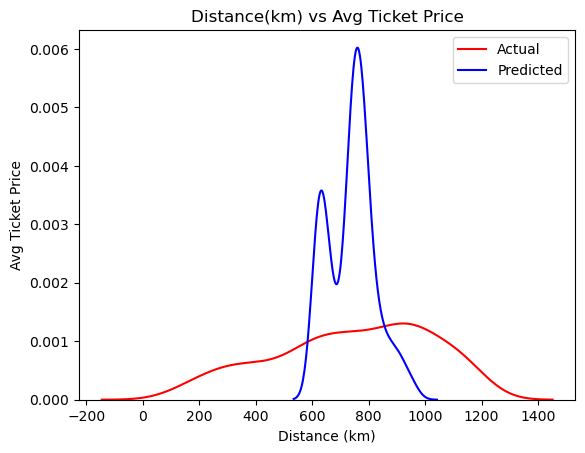

In [7]:
pred_plot = sns.distplot(df['AvgTicketPrice'], hist=False, color='r',label = 'Actual Avg Price of Ticket')

sns.distplot(Yhat, hist=False, color='b', label = 'Predicted plot', ax=pred_plot)

plt.title("Distance(km) vs Avg Ticket Price")
plt.xlabel("Distance (km)")
plt.ylabel("Avg Ticket Price")

plt.legend(['Actual', 'Predicted'])
plt.show()

In [8]:
#The graph enabled me to learn that distance has little effect on the price. Let's see their correlation
mse = mean_squared_error(Y,Yhat)
r2 = r2_score(Y,Yhat)

if (r2 < 0.10 and mse < 100000):
    print(f'SLR model is not a good fit with a poor MSE/R2-Score of {mse}/{r2}')
    print('Let\'s see the next model to improve this')
else:
    print(f'SLR model is a good fit. MSE/R2-Score = {mse}/{r2}')

SLR model is not a good fit with a poor MSE/R2-Score of 69503.85894242508/0.08805804436199627
Let's see the next model to improve this


## 2.Multiple Linear Regression

In [9]:
#I can only find 1 extra feature which might affect the price, and it is the flight time. Maybe this dataset is not a good example yet
#Check data first
#df.info()
#I want to convert flight time minute to float64.
df['FlightTimeMin'] = df['FlightTimeMin'].str.replace(',','').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AvgTicketPrice      324 non-null    float64
 1   Cancelled           324 non-null    bool   
 2   Dest                324 non-null    object 
 3   DestAirportID       324 non-null    object 
 4   DestCityName        324 non-null    object 
 5   DestCountry         324 non-null    object 
 6   DestLocation        324 non-null    object 
 7   DestRegion          324 non-null    object 
 8   DestWeather         324 non-null    object 
 9   DistanceKilometers  324 non-null    float64
 10  DistanceMiles       324 non-null    object 
 11  FlightDelay         324 non-null    bool   
 12  FlightDelayMin      324 non-null    int64  
 13  FlightDelayType     324 non-null    object 
 14  FlightNum           324 non-null    object 
 15  FlightTimeHour      324 non-null    float64
 16  FlightTi

In [10]:
#Start multiple linear regression
mlr = LinearRegression()

X_mlr = df[['DistanceKilometers', 'FlightTimeMin']]
Y_mlr = Y

#fit the model
mlr.fit(X_mlr,Y_mlr)

#predict
Yhat_mlr = mlr.predict(X_mlr)

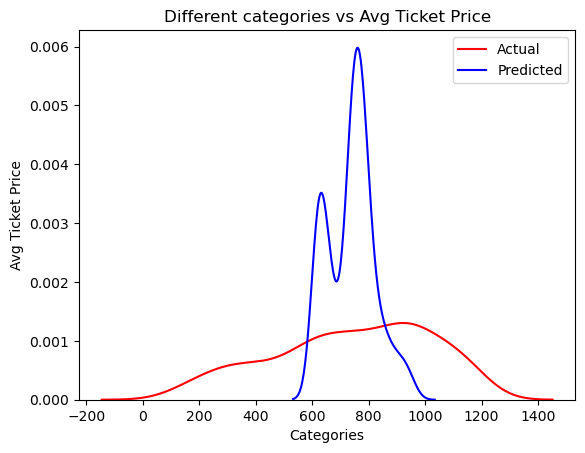

In [11]:
#plot the dist graph

actual_plot_mlr = sns.distplot(Y_mlr, hist=False, color='r', label='Actual Ticket Price')

sns.distplot(Yhat_mlr, hist=False, color='b', label='Predicted Ticket Price', ax=actual_plot_mlr)

plt.title("Different categories vs Avg Ticket Price")
plt.xlabel("Categories")
plt.ylabel("Avg Ticket Price")

plt.legend(['Actual', 'Predicted'])
plt.show()

In [12]:
#The graph enabled me to learn that distance has little effect on the price. Let's see their correlation
mse = mean_squared_error(Y,Yhat_mlr)
r2 = r2_score(Y,Yhat_mlr)

if (r2 < 0.10 and mse < 100000):
    print(f'MLR model is not a good fit with a poor MSE/R2-Score of {mse}/{r2}, actually it is not a good fit at all')
    print('Let\'s see the next model to improve this')
else:
    print(f'MLR model is a good fit. MSE/R2-Score = {mse}/{r2}')

MLR model is not a good fit with a poor MSE/R2-Score of 69477.09596707932/0.08840919436210959, actually it is not a good fit at all
Let's see the next model to improve this


## 3. Polynomial Linear Regression

In [13]:
#Since SLR/MLR are not good models, so i will reuse SLR, with polynomial features. Using polynomial regression to create polynomial of different degrees and see if we can improve the model
X = X.to_numpy().ravel()

f1 = np.polyfit(X,Y,1)
#print(f.shape) - shape is still 2d
f1 = np.squeeze(f1) #convert to 1d
#print(f1.shape) #confirm it is 1d

p1 = np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
f3 = np.squeeze(f3)

p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y,5)
f5 = np.squeeze(f5)

p5 = np.poly1d(f5)

In [14]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

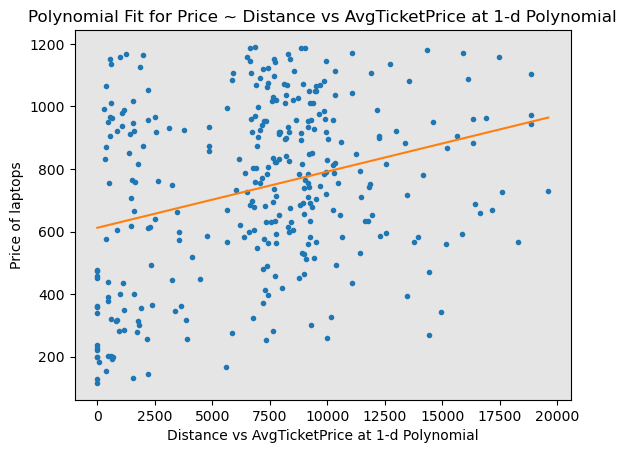

In [15]:
PlotPolly(p1, X,Y,'Distance vs AvgTicketPrice at 1-d Polynomial')

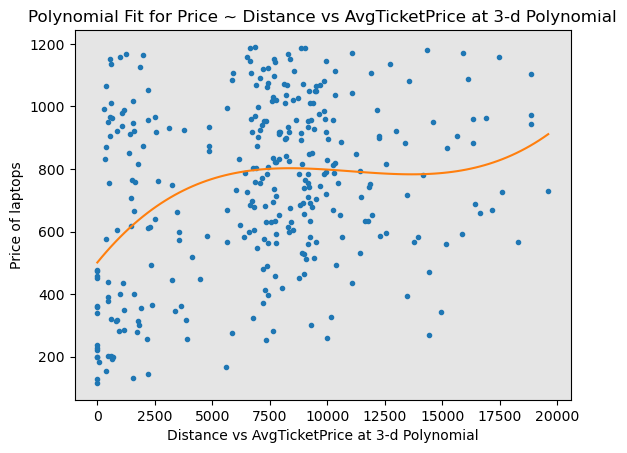

In [16]:
PlotPolly(p3, X,Y,'Distance vs AvgTicketPrice at 3-d Polynomial')

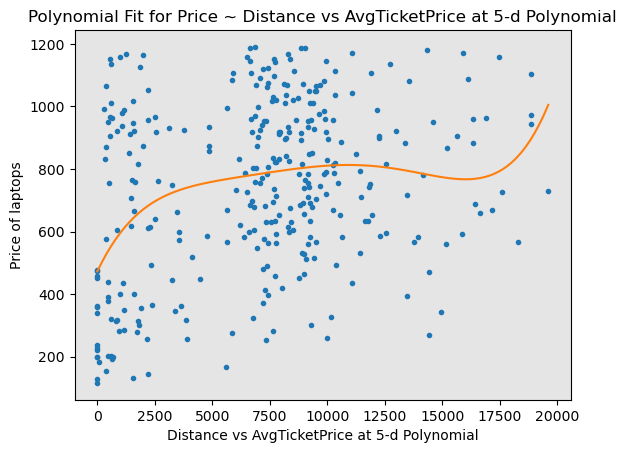

In [17]:
PlotPolly(p5, X,Y,'Distance vs AvgTicketPrice at 5-d Polynomial')

In [18]:
#It looks better, but let's check their correlation. I think it should be better than SLR, but still not a very good model
r2_1 = r2_score(Y,p1(X))
mse_1 = mean_squared_error(Y,p1(X))
r2_3 = r2_score(Y,p3(X))
mse_3 = mean_squared_error(Y,p3(X))
r2_5 = r2_score(Y,p5(X))
mse_5 = mean_squared_error(Y,p5(X))

print(f'[1D]R-Score/MSE: {r2_1}/{mse_1}, \n[3D]R-Score/MSE: {r2_3}/{mse_3}, \n[5D]R-Score/MSE: {r2_5}/{mse_5}')

[1D]R-Score/MSE: 0.08805804436199627/69503.85894242508, 
[3D]R-Score/MSE: 0.12949497790810394/66345.73383765302, 
[5D]R-Score/MSE: 0.1329090317668019/66085.5309636107


In [19]:
print("Conclusion: 5D has the best R-Score and lowest MSE, but still distance is not a very good predictor for the price of the ticket")

Conclusion: 5D has the best R-Score and lowest MSE, but still distance is not a very good predictor for the price of the ticket


## 4. Pipeline

In [20]:
Input = [('scale', StandardScaler()), ('Polynomial', PolynomialFeatures()), ('model', LinearRegression())]

pipe = Pipeline(Input)

X_mlr = X_mlr.astype(float)

pipe.fit(X_mlr, Y)

ypipe = pipe.predict(X_mlr)

In [22]:
mse = mean_squared_error(Y, ypipe)
r2 = r2_score(Y, ypipe)
print(f'MSE/R2 = {mse}/{r2}')

MSE/R2 = 66687.04424155872/0.12501673336235586


In [23]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])